In [1]:
from turtle import color
import pandas as pd
from numpy import *
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter, NullFormatter
%matplotlib inline  

font = {"size"   : 24}
plt.rc("font", **font)

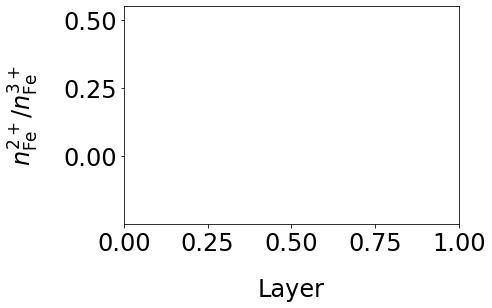

In [2]:
fig, axs = plt.subplots(1)

axs.set_ylabel(r"$n_{\mathrm{Fe}}^\mathrm{2+}/n_{\mathrm{Fe}}^\mathrm{3+}$",
                  labelpad=22, fontsize=24)

axs.set_xlabel("Layer",labelpad=22)

axs.set_ylim([-0.25, 0.55])
axs.set_yticks([0.0, 0.25, 0.50])

In [3]:
#a = 1530  # nFeO
#b = 780   # nFeT
#c = 3120  # nO

p = 1.050 # qFe(II)
q = 1.575 # qFe(III)

In [4]:
nextraFe3 = 18

#################
### (001)-dbt ###
#################

# create array with atoms in different thick slabs
nFeO = arange(864,0,-36)                     # nFeO
nFeT = arange(414,0,-18)                     # nFeT
nO   = arange(1728,0,-72)                    # O

print("nFeO: ", nFeO)
print("nFeT: ", nFeO)
print("nO: ", nFeO)

nFeO = nFeO[:min([len(nFeO),len(nFeT),len(nO)])]
nFeT = nFeT[:min([len(nFeO),len(nFeT),len(nO)])]
nO   =   nO[:min([len(nFeO),len(nFeT),len(nO)])]

lz   = linspace(48.834,48.834-2.120*(len(nFeO)-1),len(nFeO))  # thickness of slab
l = linspace(47,3,23)

print("lz: ", lz)
print("l: ", l)

r = array([])
r1 = array([])
r2 = array([])

for a,b,c,d in zip(nFeO,nFeT,nO,l):
  
  # nFeT(II)/nFeT(III)
  y = arange(0,b+1,50)/float(b) 

  # nFeO(II)/nFeO(III)
  x = (-a*q -b*p*y +b*q*y -b*q +c*p) / (a*p - a*q)

  # bare surface nfe2/nfe3
  r = append(r,mean((a*x+b*y)/(a*(1.-x)+b*(1.-y))))
  
  # full coverage with 18 excess fe3 
  r1 = append(r1,mean(((a*x+b*y)-18.)/(a*(1.-x)+b*(1.-y)+18.)))

  # half coverage with 9 excess fe3 
  r2 = append(r2,mean(((a*x+b*y)-9.)/(a*(1.-x)+b*(1.-y)+9.)))

  #print("nFe_tot", a+b)
  #print("nFe_2+", a*x+b*y)
  #print("nFe_3+", a*(1.-x)+b*(1.-y))
  #print("nFe_2/nFe_3", mean((a*x+b*y)/(a*(1.-x)+b*(1.-y))))
  #print("nFe_2/nFe_3 with excess", r2)

  #print("##############")

  #print("nFeT(II)/nFeT(III)", y)
  #print("nFeT(II)/nFeT(III)", x)

# plot data according to eq. in manuscript
axs.plot(l,r,label='(001)-DBT / bare',color='blue', linestyle='solid', linewidth=4)
axs.plot(l,r2,label='(001)-DBT / fa-half-cover.',color='blue',linestyle='dashed', linewidth=4)
axs.plot(l,r1,label='(001)-DBT / fa-full-cover.',color='blue', linestyle='dotted', linewidth=4)


# plot (111) dft results
#  on 001 with 13L we actually observed Fe2.5+
#  half of them is thus counted as 3+ and half 2+ 
nFe2_dft = array([4,8,12],dtype=float)
nFe3_dft = array([24,32,40],dtype=float)
lz_dft = array([9,13,17])

# New values from gregor 08.07.2022
nfe2_fe3_dft = array([0.3333])
lz2_dft = array([21])

#axs.plot(lz_dft,nFe2_dft/nFe3_dft,'x',color='red', 
#            markersize=3, markeredgewidth=12)

#axs.plot(lz2_dft,nfe2_fe3_dft,'x',color='red', 
#            markersize=3, markeredgewidth=12)
#################
### (001)-scv ###
#################

# create array with atoms in different thick slabs
nFeO = arange(16,128,4)                    # nFeO
nFeT = arange(10,66,2)                     # nFeT
nO   = arange(40,264,8)                    # O

nFeO = nFeO[:min([len(nFeO),len(nFeT),len(nO)])]
nFeT = nFeT[:min([len(nFeO),len(nFeT),len(nO)])]
nO   =   nO[:min([len(nFeO),len(nFeT),len(nO)])]
lz   = linspace(8.378,8.378+2.131*(len(nFeO)-1),len(nFeO))  # thickness of slab

l = linspace(9,9+((len(nFeO)-1)*2),len(nFeO))

r = array([])
for a,b,c,d in zip(nFeO,nFeT,nO,l):
  # nFeT(II)/nFeT(III)
  y = arange(0,b+1,50)/float(b) 
  # nFeO(II)/nFeO(III)
  x = (-a*q -b*p*y +b*q*y -b*q +c*p) / (a*p - a*q)
  r = append(r,mean((a*x+b*y)/(a*(1.-x)+b*(1.-y))))

# plot data according to eq. in manuscript
axs.plot(l,r,label='(001)-SCV / bare',color='C2', linewidth=4)
nfe2_nfe3_dft = array([0,0.055555556,0.136363636,0.233333333,
                       0.264705882,0.30952381])
lz_dft = array([9,13,17,25,29,37])

#axs.plot(lz_dft,nfe2_nfe3_dft,'x',color='C2', 
#            markersize=3, markeredgewidth=12)

axs.axhline(0.5,linestyle='--',color='k',
               label=r'Ideal $\mathrm{Fe}_3 \mathrm{O}_4$', 
               linewidth=3)
axs.legend(framealpha=0.0, ncol=1, loc='best', fontsize=14)

fig.patch.set_facecolor('white')



nFeO:  [864 828 792 756 720 684 648 612 576 540 504 468 432 396 360 324 288 252
 216 180 144 108  72  36]
nFeT:  [864 828 792 756 720 684 648 612 576 540 504 468 432 396 360 324 288 252
 216 180 144 108  72  36]
nO:  [864 828 792 756 720 684 648 612 576 540 504 468 432 396 360 324 288 252
 216 180 144 108  72  36]
lz:  [48.834 46.714 44.594 42.474 40.354 38.234 36.114 33.994 31.874 29.754
 27.634 25.514 23.394 21.274 19.154 17.034 14.914 12.794 10.674  8.554
  6.434  4.314  2.194]
l:  [47. 45. 43. 41. 39. 37. 35. 33. 31. 29. 27. 25. 23. 21. 19. 17. 15. 13.
 11.  9.  7.  5.  3.]


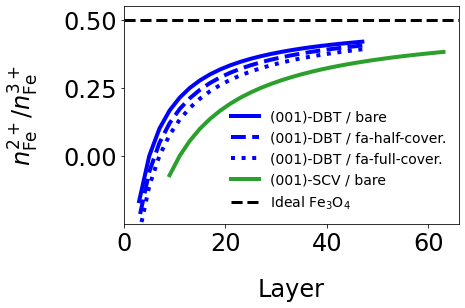

In [5]:
fig

In [7]:
fig.savefig('nfe2fe3_coated.pdf',format='pdf', bbox_inches = "tight")
fig.savefig('nfe2fe3_coated.png', dpi=300.0,format='png', bbox_inches = "tight")